# Material de aula - Aprendizado de Máquina

Instruções para a realização desta atividade:

1. Faça o download deste notebook Jupyter para sua estação de trabalho
2. Realize as atividades solicitadas dentro do notebook, nos espaços apropriados e indicados
3. Salve o notebook no seguinte padrão: <nome_sobrenome_RA>.ipynb (por exemplo: **rodrigo_caropreso_123456.ipynb ** )
4. Envie o notebook com a atividade realizada na sala de aula da disciplina (Google Classroom)

** DATA DE ENTREGA DESTA ATIVIDADE: 22/12/2018 **

** VALOR DESTA ATIVIDADE: 1,0 ponto **


## K-Means - Exercício 01

In [1]:
#CÉLULA KMEANS-LIB-01
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#CÉLULA KMEANS-LIB-02
def euclidean_distance(v1, v2) :
    '''
    Esta função recebe 2 arrays (do tipo np.array) e retorna a distância euclidiana entre eles
    
    Parâmetros
    ----------
    v1 -> vetor de coordenadas do primeiro ponto
    v2 -> vetor de coordenadas do segundo ponto
    
    Retorno
    -------
    Distância entre os dois pontos    
    '''
    return np.sqrt( sum((v1 - v2)**2) )

In [3]:
#CÉLULA KMEANS-LIB-02
def calcBestK(N) :
    '''
    Calcula, a título de "chute inicial", um valor para o número de clusters (K)
    
    Parametros
    ----------
    N -> número de amostras disponiveis
    
    Retorno
    -------
    Número de clusters a serem usados
    '''
    return int(np.sqrt(N/2))

In [5]:
#CÉLULA KMEANS-LIB-03

def kmeans(vData, nClusters) :
    '''
    Este método calcula os centroides dos clusters de um conjunto de dados a partir do algoritmo k-means
    
    Parâmetros
    ----------
    vData -> vetor de coordenadas N-Dimensionais dos dados. Cada posição do array deve ser uma lista de coordenadas
        
    Retorno
    -------
    Array contendo a lista de pontos observados, onde cada posição do array corresponde a um clusterId. 
    Cada ponto do array de retorno é definido como um dicionário com a seguinte estrutura:
        {
         'pointCoord'  : coordenadas do ponto, 
         'centerCoord' : coordenadas de seu centroide, 
         'clusterId'   : identificador do cluster
        }
    '''

    #Inicializa os centroides    
    #Inicialização usando kmeans++
    vClusterCenters = [vData[0]]
    for k in range(1, nClusters):
        D2 = np.array([min([np.inner(c-x,c-x) for c in vClusterCenters]) for x in vData])
        probs = D2/D2.sum()
        cumprobs = probs.cumsum()
        r = np.random.rand()
        for j,p in enumerate(cumprobs):
            if r < p:
                i = j
                break
        vClusterCenters.append(vData[i])
        
    vPoints = [{'point':point, 'clusterId' : -1, 'centerCoord' : point*0} for point in vData]
    
    clusterIsChanging = True
    while(clusterIsChanging == True) :
    
        clusterIsChanging = False

        vClusterPoints  = [[]] * nClusters #cria lista de listas com tamanho nClusters. O indice primario corresponde a cada cluster

        for dataPoint in vPoints :
            vDistances = [ euclidean_distance(dataPoint['point'], center) for center in vClusterCenters ]
            clusterIndex = np.argmin(vDistances)

            if( dataPoint['clusterId'] != clusterIndex ) :
                dataPoint['clusterId']  = clusterIndex
                clusterIsChanging = True

        #Após a redistribuição dos pontos, recalcula os centroides
        for clusterIndex, clusterCenter in enumerate(vClusterCenters) :
            clusterData = [ point['point'] for point in vPoints if point['clusterId'] == clusterIndex ]
            vClusterCenters[clusterIndex] = np.mean(clusterData, axis=0) #atualiza centroide do cluster indicado pelo clusterIndex

    
    clusterCentroids = set()
    for dataPoint in vPoints :
        dataPoint['centerCoord'] = vClusterCenters[dataPoint['clusterId']]

    return (vPoints, vClusterCenters)

In [6]:
#CÉLULA KMEANS-LIB-04
def cluster_distortion(vDataPoints, nClusters) :
    '''
    Esta função calcula a distorção intra-cluster
    
    Parâmetros
    ----------
    vDataPoints -> array contendo os pontos (dados observados). Cada ponto é definido como um dicionário com a seguinte estrutura
        {'pointCoord' : coordenadas do ponto, 'centerCoord' : coordenadas de seu centroide, 'clusterId' : identificador do cluster}
    
    nClusters   -> quantidade de clusters utilizados
    
    
    Retorno
    -------
    
    Um array contendo a distorção intra-cluster de todos os clusters, onde cada posição do array corresponde ao clusterId    
    '''
    
    vClusterDist = []
    for i in range(nClusters) :
        vClusterPoints = [point for point in vDataPoints if point['clusterId'] == i]
        distance = sum([euclidean_distance(point['point'], point['centerCoord'])**2 for point in vClusterPoints])
        vClusterDist.append(distance)
    
    return vClusterDist    

In [7]:
#CÉLULA KNN-LIB-01
from collections import OrderedDict
def kNN(vData, nClasses, value, k) :
    '''
    Define a classe a qual pertence um dado valor baseado na quantidade k de vizinhos mais próximos
    
    Parâmetros
    ----------
    vData    -> array contendo os dados que compõem as observações e suas respectivas denominações (labels)
    nClasses -> quantidade de classes (labels) utilizada
    value    -> dado a ser classificado através do k-NN
    k        -> quantidade de vizinhos necessários para a realização da votação (classificação)
    
    Retorno
    -------
    A função retorna um valor correspondente ao índice da classe vencedora ('0' -> classe 0, '1' -> classe 1, etc)
    '''
    
    distances = [ {'dist' : euclidean_distance(v1['point'], value), 'class': v1['class']} for v1 in vData ]
    print(distances)
    sortedItemsbyDistance = sorted(distances, key=lambda k: k['dist'])
    
    selectedNeighbours = sortedItemsbyDistance[0:k]
    
    vClasses = np.zeros(nClasses)
    
    for neighbour in selectedNeighbours :
        vClasses[ int(neighbour['class']) ] += 1
        
    return np.argmax(vClasses) #indice da classe vencedora ('0' -> classe 0, '1' -> classe 1, etc)

# Clusterização e Classificação usando K-Means e K-NN


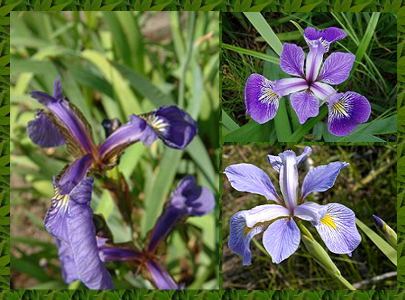

## As três flores da imagem principal desse texto são de uma espécie chamada Iris. Apesar disso, são de sub-espécies diferentes, sendo elas: Iris Setosa (à esquerda), Iris Versicolor (à direita e acima) e Iris Virginica (à direita e abaixo). 

### Em 1936, o estatístico R.A. Fisher publicou um artigo em que apresentava dados sobre essas plantas com base em medidas de suas pétalas e sépalas. 

### Neste exerício, vamos estudar um pouco aprendizado de máquina e como implementar um programa que: 

### 1. Recebe as medidas de pétalas e sépalas como no estudo de R.A. Fisher; 

### 2. Aprende a identificar qual a sub-espécie correta; 

### 3.comprova o aprendizado com um teste.

*Fonte:* [IASC - INTELIGÊNCIA ARTIFICIAL SOB CONTROLE](https://iascblog.wordpress.com/2017/03/17/aprendizado-de-maquina-supervisionado-com-python/)

--------

## O dataset conté  3 classes de 50 instâncias cada um, onde cada classe refere-se a um tipo de planta 'Iris'. Uma classe é linearmente separável das demais; Outras duas classes não são linearmente separáveis entre si.

### O atributo de saída do Perceptron, que corresponde à predição do modelo é: Classe de Planta Íris

## O arquivo desta atividade (Iris.csv) contém informações reais sobre as plantas organizadas da seguinte forma:

- **sepal length in cm** : comprimento da sépala (cm)
- **sepal width in cm**  : Largura da sépala (cm)
- **petal length in cm** : comprimento da pétala (cm)
- **petal width in cm**  : largura da pétala (cm)
- **Classes**: 
    - Iris Setosa 
    - Iris Versicolour 
    - Iris Virginica
    
*Fonte:* [UCI - Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris)

## O objetivo deste estudo é realizar a análise do dataset através da clusterização com k-means e avaliar o desempenho de um classificador capaz de realizar a predição a qual classe pertence um dado conjunto de medidas de uma planta, através de k-NN.

## Efetue a carga do arquivo através da biblioteca _Pandas_ e a partir do _DataFrame_ gerado, efetue as operações necessárias para realizar as atividades solicitadas.

## 1 - Importando o DataSet

In [15]:
dfDataFile = pd.read_csv('Iris.csv')

## 2 - Ajustando o dataset (Data Munging)

## 2.1 - Utilizando o comando 'replace' para dataframe pandas, faça a substituição da coluna 'species' pelos seguintes valores:

## {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}



In [16]:
pd.options.mode.chained_assignment = None  # default='warn'

dfExample = dfDataFile

#Transformando os valores de target em numeros.
df1 = dfExample[dfExample.Species == 'Iris-virginica']
df1['Class'] = 0

df2 = dfExample[dfExample.Species == 'Iris-versicolor']
df2['Class'] = 1

df3 = dfExample[dfExample.Species == 'Iris-setosa']
df3['Class'] = 2

#remover a coluna que não será utilizada no perceptron, para isso basta remover a coluna da seleção
df1 = df1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Class']]
df2 = df2[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Class']]
df3 = df3[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Class']]
#Cria o dataset de exemplo com dados ajustados
dfDataFile = pd.concat([df1, df2, df3])


In [17]:
print(dfDataFile.shape)
dfDataFile.head(2)

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
100,6.3,3.3,6.0,2.5,0
101,5.8,2.7,5.1,1.9,0


## 2.2 - Remova a coluna 'Id' do dataframe

já foi feito acima, concatenando os DF sem o ID

## 3 - Análise de clusterização com k-means

## As duas funções abaixo foram definidas para permitir o cálculo de dois parâmetros que podem ser utilizados para a definição da quantidade de clusters K que deve ser utilizada no modelo.

In [18]:
def within_cluster_dispertion(clusterData, vClusterCenters) :
    '''
    Calcula a dispersão intra-cluster e retorna o valor calculado (Within-cluster Squared Sum)
    '''
    cd = cluster_distortion(clusterData, nClusters)
    return sum(cd)

In [19]:
def between_cluster_dispersion(clusterData, vClusterCenters, C) :
    BSS=0
    for clusterId in range(len(vClusterCenters)) :
        vDataPoints = [ point for point in clusterData if point['clusterId'] == clusterId]
        nPoints = len(vDataPoints)
        clusterCenter = vClusterCenters[clusterId]
        
        BSS += nPoints * euclidean_distance(C, clusterCenter) ** 2
    
    return BSS

## 4 - ATIVIDADE: complete a célula abaixo, com o seguinte algoritmo:

##  Para cada valor 'K' de clusters variando de 1 a 30 faça:

### 1 - O cálculo do K-means para o conjunto de dados
### 2 - O cálculo da dispersão intra-cluster, armazenando o resultado na lista WSS
### 3 - O cálculo da dispersão inter-cluster, armazenando o resultado na lista BSS

**NOTA: a variável 'C' representa o centro de todos os dados observados, e é um parâmetro da função 'between_cluster_dispersion' **

In [20]:
dfArray = dfDataFile.values
vPoints, vClusterCenters = kmeans(dfArray, 3)
C = np.mean(dfArray, axis=0)


len(vPoints)
vClusterDist_WSS = cluster_distortion(vPoints, 3)
vClusterDist_BSS = between_cluster_dispersion(vPoints, vClusterCenters, C)
#print(vPoints)
print(vClusterDist_WSS)
print(vClusterDist_BSS)

[39.15551020408165, 15.240400000000003, 32.91411764705883]
693.5143721488594


In [21]:
dfArray = dfDataFile.values
WSS =[] #Dispersão intra-cluster
BSS = [] #dispersão inter cluster
C = np.mean(dfArray, axis=0)

for nClusters in range(1,30) :
    #calculando kmeans
    vPoints, vClusterCenters = kmeans(dfArray, nClusters)
    #calculando e apendando o intraclusters
    WSS.append([ cluster_distortion(vPoints, nClusters),vPoints ])
    #calculando e apendando o inter_clusters
    BSS.append( between_cluster_dispersion(vPoints, vClusterCenters, C))

    


## 5 - ATIVIDADE: complete a célula abaixo, plotando o gráfico (No de Clusters X WSS):

In [63]:
numero_klusters = [i for i in range(len(WSS))]
len(numero_klusters)

29

In [69]:
wssY = [x[0][0] for x in WSS]


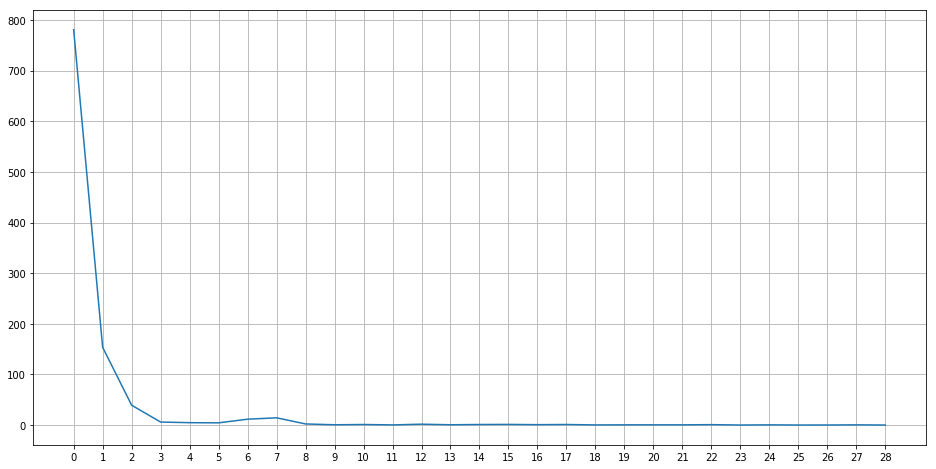

In [127]:
plt.figure(figsize=(16,8))
plt.grid()
labels = numero_klusters;
plt.xticks(numero_klusters, labels)
plt.plot(numero_klusters,wssY)
#IMPLEMENTE O CÓDIGO AQUI

## 6 - ATIVIDADE: complete a célula abaixo, plotando o gráfico (No de Clusters X BSS):

In [73]:
len(BSS)

29

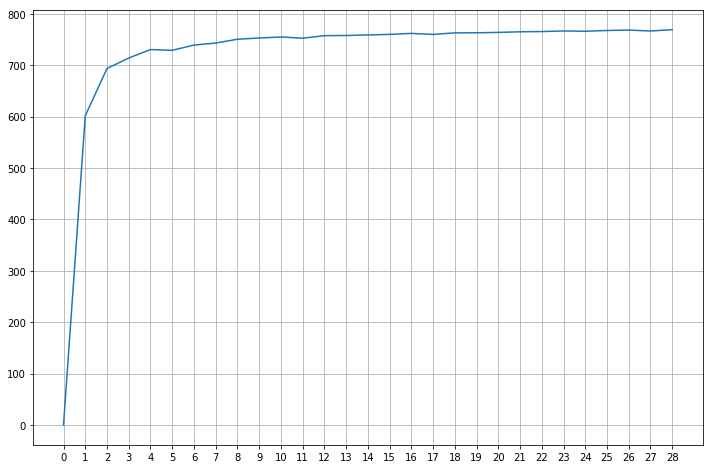

In [128]:
plt.figure(figsize=(12,8))
plt.grid()
labels = numero_klusters;
plt.xticks(numero_klusters, labels)
plt.plot(numero_klusters,BSS)
#IMPLEMENTE O CÓDIGO AQUI

## 7 - Os parâmetros BSS e WSS possuem uma propriedade interessante para a validação dos cálculos: sua soma é constante

## ATIVIDADE: utilizando o comando np.asscalar(.) plote o gráfico (No de Clusters X (WSS + BSS) ), verificando que o resultado é constante

In [108]:
#IMPLEMENTE O CÓDIGO AQUI
wssBss = []
for w, b in zip(wssY,BSS):
    wssBss.append([(w+b)])
  
wssBssS = []
for w, b in zip(wssY,BSS):
    wssBssS.append([np.asscalar(w+b)])
   


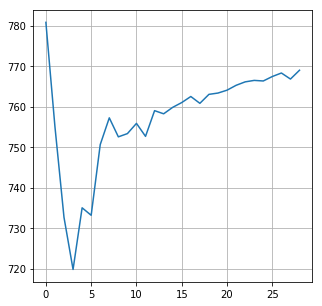

In [110]:
plt.figure(figsize=(5,5))
plt.grid()
plt.plot(numero_klusters,wssBss)
#IMPLEMENTE O CÓDIGO AQUI

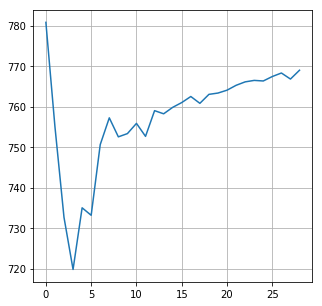

In [111]:
plt.figure(figsize=(5,5))
plt.grid()
plt.plot(numero_klusters,wssBssS)
#IMPLEMENTE O CÓDIGO AQUI

## 8 - Leia o texto apresentado em : [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering))

## Ele basicamente descreve a metodologia para se escolher um valor de K baseado no WSS ou BSS.

## Baseado no texto, qual valor você considera razoável para ser utilizado no k-means e por que?


** RESPOSTA : **

Voltando analisar os gráficos da 5  e 6 adicionando mais steps no grafico WSS o cotovelo aparece com 2 clusteres.
O curioso que o gŕafico do BSS também tem o cotovelo localizado com 2 clusteres,

## 9 - A célula abaixo explora uma característica do scikit-learn, que veremos na próxima aula.

## Basicamente, o que a célula faz é: dividir o dataset em duas partes, uma contendo 80% dos dados para 'treino' e outra contendo 20% dos dados para 'teste'


## ATIVIDADE: verifique o conteúdo das variáveis X_train, X_test, y_train, y_test

In [132]:
from sklearn.cross_validation import train_test_split
#nos removemos species trocamos pro class qdo trocamos pra numeros.
X = dfDataFile.drop(['Class'], axis=1).copy()
y = dfDataFile.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [148]:
# esse dataframe é de treinamento esta apenas com as caracteristicas que serão usado para classificação.
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
37,4.9,3.1,1.5,0.1
84,5.4,3.0,4.5,1.5
127,6.1,3.0,4.9,1.8
27,5.2,3.5,1.5,0.2
32,5.2,4.1,1.5,0.1
59,5.2,2.7,3.9,1.4
118,7.7,2.6,6.9,2.3
83,6.0,2.7,5.1,1.6
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2


In [147]:
# esse dataframe é de teste esta apenas com as caracteristicas que serão usado para classificação.
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
62,6.0,2.2,4.0,1.0
133,6.3,2.8,5.1,1.5
7,5.0,3.4,1.5,0.2
107,7.3,2.9,6.3,1.8
0,5.1,3.5,1.4,0.2
140,6.7,3.1,5.6,2.4
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [144]:
#serie class de treino
print(y_train)

37     2
84     1
127    0
27     2
32     2
59     1
118    0
83     1
61     1
92     1
12     2
102    0
41     2
143    0
110    0
60     1
16     2
44     2
19     2
8      2
69     1
35     2
56     1
80     1
23     2
33     2
6      2
46     2
50     1
47     2
      ..
114    0
22     2
119    0
129    0
30     2
149    0
36     2
99     1
82     1
79     1
15     2
45     2
72     1
77     1
125    0
81     1
40     2
42     2
139    0
58     1
88     1
70     1
87     1
136    0
121    0
109    0
3      2
67     1
17     2
147    0
Name: Class, Length: 120, dtype: int64


In [145]:
#serie class de test
print(y_test)

14     2
62     1
133    0
7      2
107    0
0      2
140    0
86     1
76     1
71     1
34     2
51     1
73     1
54     1
63     1
137    0
78     1
90     1
145    0
116    0
21     2
66     1
124    0
108    0
26     2
122    0
144    0
97     1
93     1
126    0
Name: Class, dtype: int64


## 10 - A célula abaixo constrói dois dicionários, utilizando os dados de treinamento e teste, respectivamente.

## Os dados de treinamento representam (no nosso modelo) os dados disponíveis das observações, ou seja, dados que possuem classes pre-definidas.

## Os dados de teste vão compor o dataset de 'prova', ou seja, verificaremos a classificação dos dados utilizando k-NN (sem levar em conta a informação da classe dos dados). A seguir, utilizaremos as classes de dados de teste que conhecemos para verificar a acuracidade do modelo.

In [149]:
#Dicionario de treino
vTrainDataDict = []
for x in zip(X_train.iterrows(), y_train):
    dataArray = np.array([ x[0][1]['SepalLengthCm'], x[0][1]['SepalWidthCm'], x[0][1]['PetalLengthCm'], x[0][1]['PetalWidthCm'] ])
    vTrainDataDict.append({ 'point' : dataArray,  'class' : x[1] })

#Dicionario de teste    
vTestDataDict = []
for x in zip(X_test.iterrows(), y_test):
     dataArray = np.array([ x[0][1]['SepalLengthCm'], x[0][1]['SepalWidthCm'], x[0][1]['PetalLengthCm'], x[0][1]['PetalWidthCm'] ]) 
     vTestDataDict.append((dataArray, x[1]))


## 10.1 - ATIVIDADE: Defina um valor de K para a classificação e faça as seguintes atividades:

### 1 - Para cada valor do conjunto de testes, faça:
### 2 - Complete o código para executar a função k-NN que deve retornar uma das classes que foram definidas no inicio da atividade (0,1 ou 2). 
### 3 - Note que o resultado da função k-nn bem como o resultado conhecido da classe são armazenados como uma tupla (winner, y_d) em uma lista chamada winnerList

In [ ]:
nClasses = 3
K = #DEFINA UM CONJUNTO DE VIZINHOS

winnerList = []
for testData, y_d in vTestDataDict :
    winner = #complete o codigo 
    winnerList.append((winner, y_d))


## 11 - ATIVIDADE: Utilizando a lista winnerList, escreva um algoritmo que calcula a acuracidade do classificador para o conjunto de teste, sabendo que a tupla gerada na célula anterior, contém a classe 'cassificada' (winner) versus a 'classe real' de cada observação (y_d).

**NOTA: Imprima o conteúdo de winnerList para ver como você pode implementar o cálculo da acuracidade, ou seja, quantos acertos o classificador fez corretamente **

## Utilizando o código que você fez acima, escolha mais 2 valores de K para o classificador e execute a análise da acuracidade para estes 2 valores. Comente o resultado.